**Weather prediction ML model.**

In [1]:
#import Packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Preparing the Dataset**

In [2]:
from pandas import read_csv
dataset = read_csv('Coba.csv', delimiter=r";")
print(dataset.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [3]:
# Information of the Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [4]:
del dataset["Date Time"]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 44.9 MB


In [6]:
# Summarize the statistics of the Dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [7]:
wv = dataset['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = dataset['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
dataset['wv (m/s)'].min()

0.0

In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [9]:
# check the missing value 
dataset.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

**EDA - Exploratory Data Analysis**

In [10]:
# Check the Correlated features
dataset.corr().transpose()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.209613,-0.204798,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,0.088368,0.125060,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,0.104622,0.140668,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.053688,-0.036217,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.312213,-0.362919,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,0.092458,0.126374,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.068902,-0.055910,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.204997,0.247497,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.065399,-0.052563,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.065322,-0.052453,0.019607


In [11]:
dataset.drop (columns=["p (mbar)", "wd (deg)", "max. wv (m/s)",
             "wv (m/s)", "sh (g/kg)", "VPdef (mbar)", 
             "VPact (mbar)", "Tdew (degC)", "rh (%)", 
             "Tpot (K)", "p (mbar)"], inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   T (degC)         420551 non-null  float64
 1   VPmax (mbar)     420551 non-null  float64
 2   H2OC (mmol/mol)  420551 non-null  float64
 3   rho (g/m**3)     420551 non-null  float64
dtypes: float64(4)
memory usage: 12.8 MB


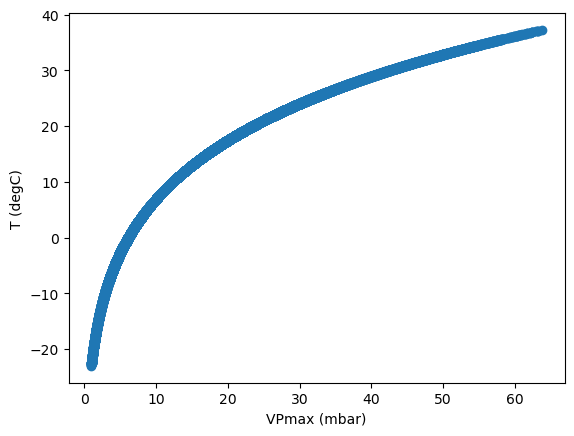

In [13]:
# Plotting between Independant and Dependent Features
# VPmax vs T (strong positive correlation)
plt.scatter(dataset['VPmax (mbar)'], dataset['T (degC)'])
plt.xlabel('VPmax (mbar)')
plt.ylabel('T (degC)')
plt.show()

The above Scatter plot shows that when 'RM' increases the 'price' also increases(Strong Postive Correlation).

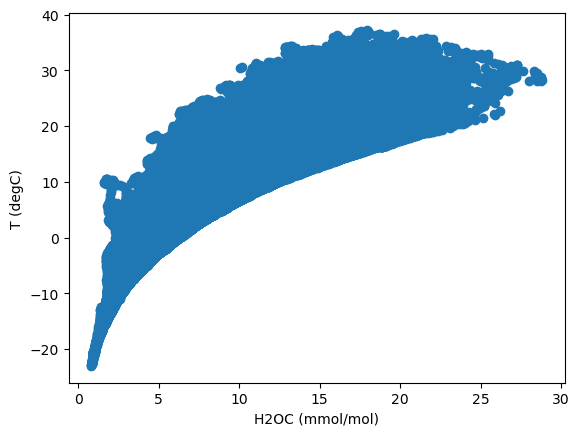

In [14]:
# H2OC vs T (Strong Positive Correlation)
plt.scatter(dataset['H2OC (mmol/mol)'], dataset['T (degC)'])
plt.xlabel('H2OC (mmol/mol)')
plt.ylabel('T (degC)')
plt.show()

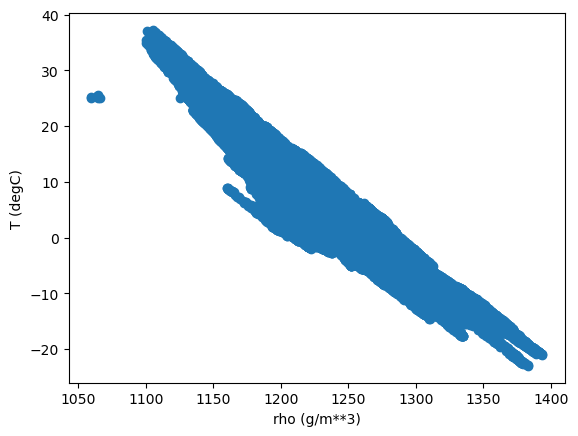

In [15]:
# Rho vs T (Strong Negative Correlation)
plt.scatter(dataset['rho (g/m**3)'], dataset['T (degC)'])
plt.xlabel('rho (g/m**3)')
plt.ylabel('T (degC)')
plt.show()

The above Scatter plot shows that when 'LSTAT' increases the 'price' decreases((Strong Postive Correlation).

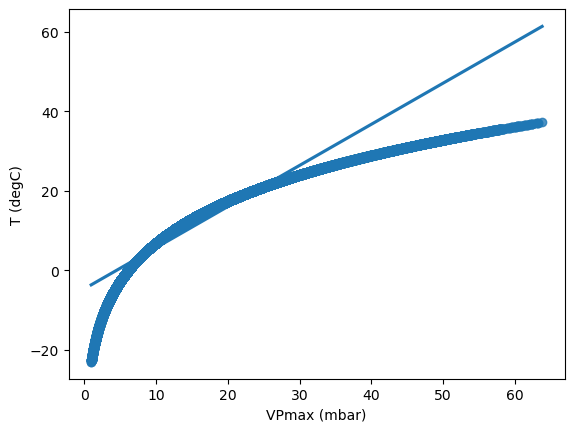

In [16]:
#Regression Plot between 'RM' and 'price'.
sns.regplot(x='VPmax (mbar)', y='T (degC)', data=dataset)
plt.show()

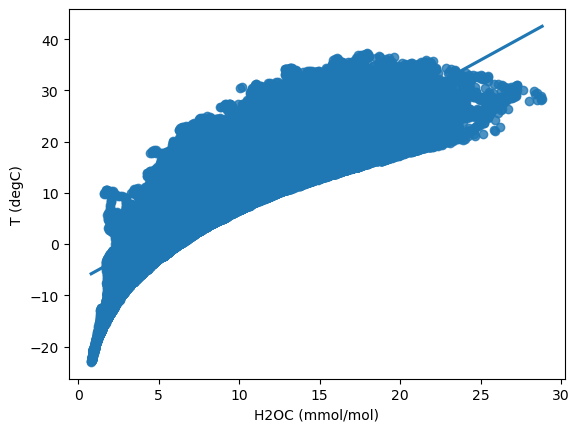

In [17]:
#Regression Plot between 'LSTAT' and 'price'.
sns.regplot(x='H2OC (mmol/mol)', y='T (degC)', data = dataset)
plt.show()

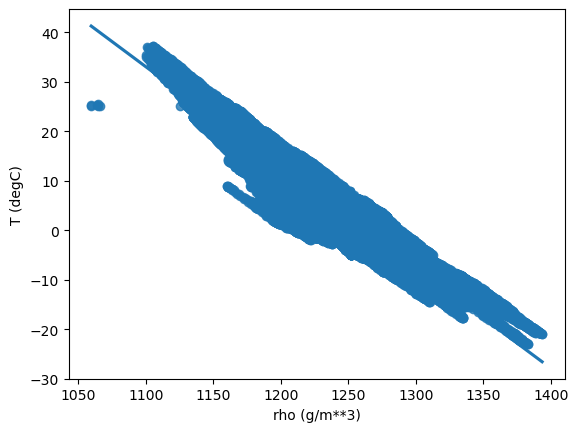

In [18]:
sns.regplot(x='rho (g/m**3)', y='T (degC)', data = dataset)
plt.show()

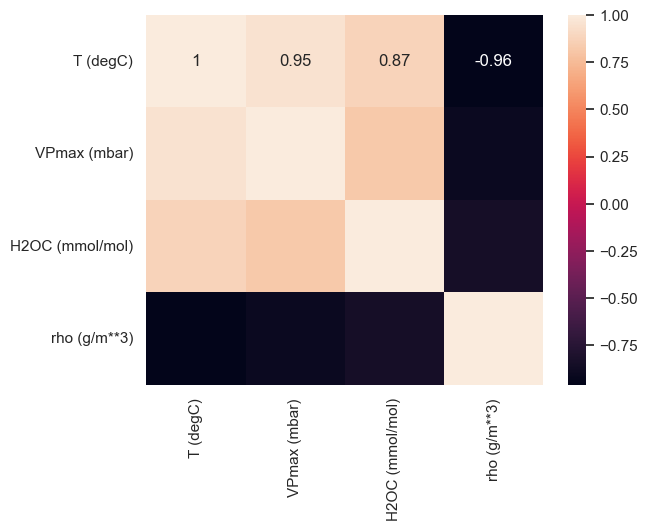

In [19]:
# Plotting a Heatmap between Independant and Dependent Features
corr = dataset.corr().round(2)
sns.set()
sns.heatmap(data=corr, annot=True)
plt.show()

**Spliting the Data**

In [20]:
# split the Independent and dependent features

X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 1]

In [21]:
X

,VPmax (mbar),H2OC (mmol/mol),rho (g/m**3)
0,3.33,3.12,1307.75
1,3.23,3.03,1309.80
2,3.21,3.02,1310.24
3,3.26,3.08,1309.19
4,3.27,3.09,1309.00
...,...,...,...
420546,4.52,3.30,1292.98
420547,4.77,3.32,1289.44
420548,4.84,3.28,1288.39
420549,4.46,3.20,1293.56


In [22]:
y

0         3.33
1         3.23
2         3.21
3         3.26
4         3.27
          ... 
420546    4.52
420547    4.77
420548    4.84
420549    4.46
420550    4.27
Name: VPmax (mbar), Length: 420551, dtype: float64

In [23]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_train 

,VPmax (mbar),H2OC (mmol/mol),rho (g/m**3)
167,4.34,4.14,1292.83
23877,16.62,15.84,1185.59
329918,16.95,9.38,1205.72
253117,19.31,14.33,1176.20
46683,10.89,8.99,1232.85
...,...,...,...
259178,7.70,7.04,1253.91
365838,9.18,7.69,1240.34
131932,15.23,13.99,1196.63
146867,9.96,6.80,1238.66


In [25]:
X_test

,VPmax (mbar),H2OC (mmol/mol),rho (g/m**3)
148963,14.29,12.14,1208.60
251175,12.75,12.80,1195.43
195409,14.96,13.32,1196.07
251028,13.18,12.11,1213.43
190017,21.03,12.02,1185.43
...,...,...,...
34265,20.45,17.78,1177.62
363766,10.48,6.95,1225.64
119730,19.53,9.39,1189.20
16914,23.02,11.52,1152.93


**Scaling a Data**

In [26]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [28]:
X_train #Standardized Training data

array([[-1.19263707, -1.29760435,  1.91879778],
       [ 0.39473111,  1.46747268, -0.76407971],
       [ 0.4373884 , -0.05922797, -0.26047728],
       ...,
       [ 0.21505344,  1.03025965, -0.48788643],
       [-0.46617052, -0.66896291,  0.56359941],
       [-0.29683402,  0.33071879,  0.0970229 ]])

In [29]:
X_test #Standardized Test data

array([[ 0.0935448 ,  0.59304661, -0.18842686],
       [-0.10552254,  0.74902531, -0.51790744],
       [ 0.18015202,  0.87191763, -0.50189623],
       ...,
       [ 0.77089083, -0.05686466, -0.67376651],
       [ 1.22202397,  0.44652116, -1.5811515 ],
       [ 0.2913195 ,  0.28817914, -0.55893615]])

**Model Training**

In [30]:
# Building a Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
# coefficients and intercept
print(regressor.coef_)

[ 7.73607545e+00 -8.90167702e-16  1.15660886e-16]


In [32]:
print(regressor.intercept_)

13.566330349712116


In [33]:
# prediction with Test data
reg_pred = regressor.predict(X_test)

In [34]:
reg_pred

array([14.29, 12.75, 14.96, ..., 19.53, 23.02, 15.82])

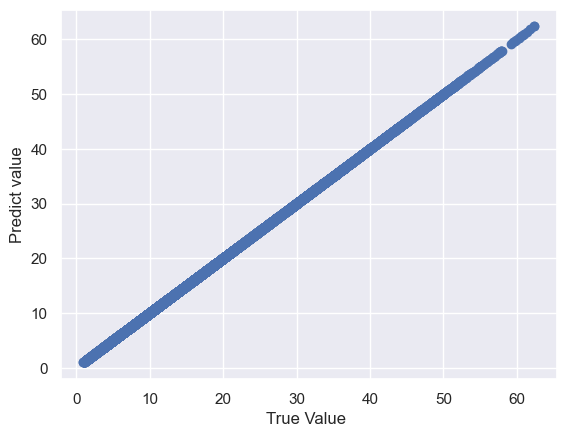

In [35]:
# plot a Scatter plot for prediction and y_test)
plt.scatter(y_test, reg_pred)
plt.xlabel('True Value ')
plt.ylabel('Predict value')
plt.show()

In [36]:
# residuals
residuals = y_test - reg_pred 
residuals

148963   -3.552714e-15
251175    1.776357e-15
195409   -5.329071e-15
251028    0.000000e+00
190017   -2.486900e-14
              ...     
34265    -2.131628e-14
363766    7.105427e-15
119730   -2.131628e-14
16914    -3.197442e-14
276876   -8.881784e-15
Name: VPmax (mbar), Length: 126166, dtype: float64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


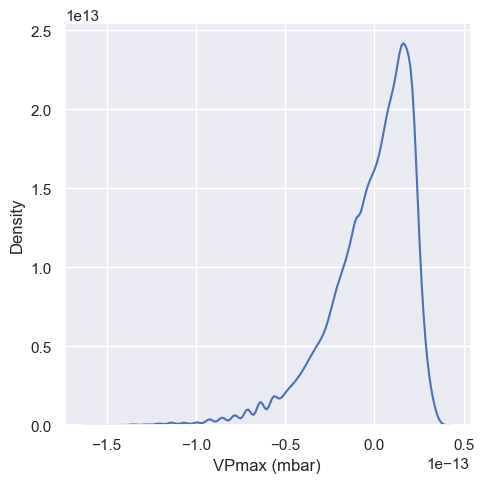

In [37]:
# plot the residuals
sns.displot(residuals, kind='kde')
plt.show()

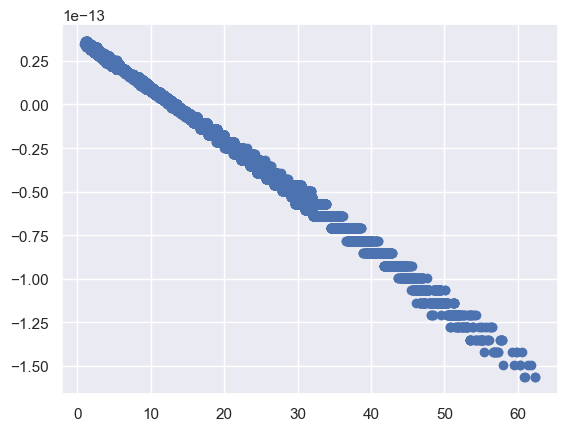

In [38]:
# plot a Scatter plot for prediction and Residuals
plt.scatter(reg_pred, residuals)
plt.show()

Evaluating the Model

In [39]:
# mean squared error 
# mean absolute error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

print('Mean Squared error : ', np.sqrt(mean_squared_error(y_test, reg_pred)))
print('Mean Absolute error: ', mean_absolute_error(y_test, reg_pred))

Mean Squared error :  2.340267336642995e-14
Mean Absolute error:  1.7653603815550894e-14


In [40]:
# R squared value 
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

1.0


**Pickling the model**

In [41]:
import pickle

In [42]:
pickle.dump(regressor,open('coba.pkl','wb'))

In [43]:
pickled_model = pickle.load(open('coba.pkl','rb'))